# Distance Correlation Plot

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


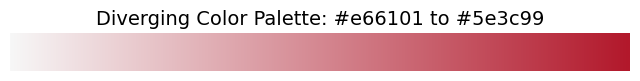

In [1]:
import pandas as pd
from local_pkgs.proj_pkg import eda_plots as eda
import yaml
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

with open("thermoelectric_properties.yaml", "r", encoding="utf-8") as file:
    properties = yaml.safe_load(file)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 1))
fig.subplots_adjust(bottom=0.5)
colors = ['#f7f7f7','#b2182b']

# Generate a colormap
gradient = [colors]
cmap = LinearSegmentedColormap.from_list("CustomDiverging", colors)

# Show the gradient
gradient_image = ax.imshow([list(range(256))], aspect='auto', cmap=cmap)
ax.set_axis_off()

# Add a title
plt.title("Diverging Color Palette: #e66101 to #5e3c99", fontsize=14)
plt.show()

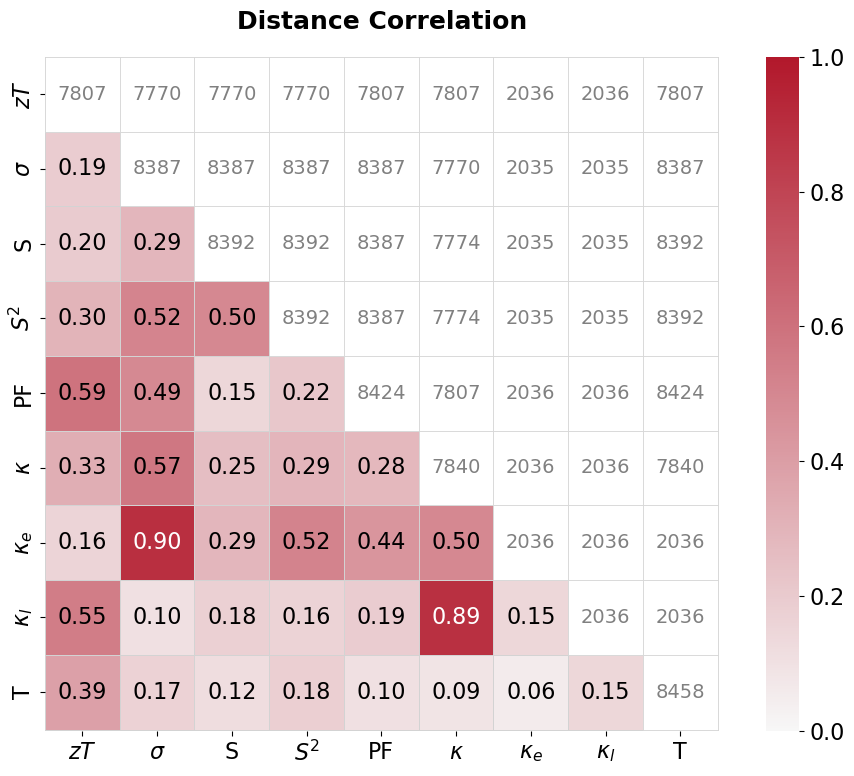

In [2]:
df = pd.read_excel("data/sysTEm_dataset.xlsx")

prop_short = []
df_copy = df.copy()

for prop, vals in properties.items():
    df_copy = df_copy.rename(columns={vals['column_name']: vals['short_name']})
    prop_short.append(vals['short_name'])

# Add temperature column
df_copy = df_copy.rename(columns={'Temperature (K)': 'T'})
prop_short.append('T')

# Add S^2 remove S
df_copy['$S^2$'] = df_copy['S']**2
prop_short.append('$S^2$')


# reorder the columns
prop_short = ['$zT$', '$\sigma$', 'S', '$S^2$', 'PF', '$\kappa$', '$\kappa_e$', '$\kappa_l$', 'T']

# output = 'Plots/Pearson Correlation/2025-01-06-V1_detailedheatmap_all_properties.png'

title = 'Distance Correlation'

# colormap=sns.diverging_palette(255, 0, s=75, l=40, sep=1, center='light', as_cmap=True)

eda.plot_distance_correlation_full_heatmap(df_copy, prop_short, title, colormap=cmap, savefig=None)
